# Importing the Required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge,RidgeCV, Lasso, LassoCV, ElasticNet,ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
from sklearn import datasets

In [3]:
boston = datasets.load_boston()

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
boston.data.shape

(506, 13)

In [6]:
df = pd.DataFrame(boston.data,columns=boston.feature_names)
df["Price"] = boston.target

In [7]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [8]:
#Checking Null values are present or not
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [9]:
#EDA

In [10]:
pf = ProfileReport(df)

In [11]:
pf.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

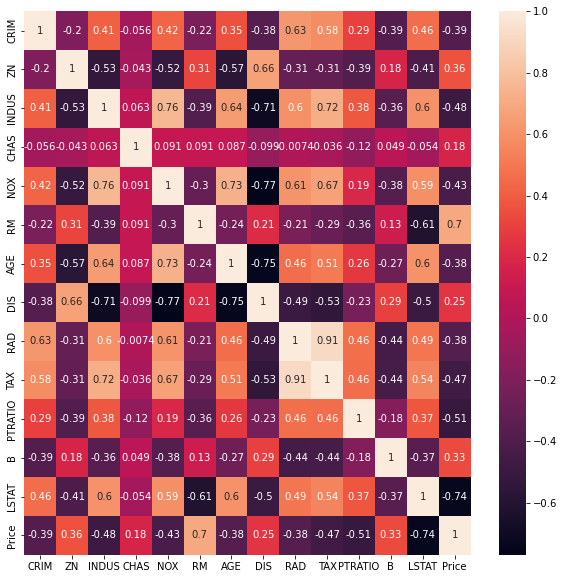

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(),annot=True)
plt.show()

In [12]:
x = df.drop(columns=["Price"]) #Dropping the target variable and taking all the other columns

In [13]:
y = df["Price"] #Taking only Target Variable

In [14]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [15]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

In [16]:
#Dividing the data into train and test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)
y_pred = linear_model.predict(x_test)
r2_score(y_pred,y_test)

0.6333247469014311

In [18]:
linear_model.score(x_train,y_train)

0.7508856358979673

In [19]:
linear_model.score(x_test,y_test)

0.6687594935356294

In [20]:
plt.style.use('dark_background')

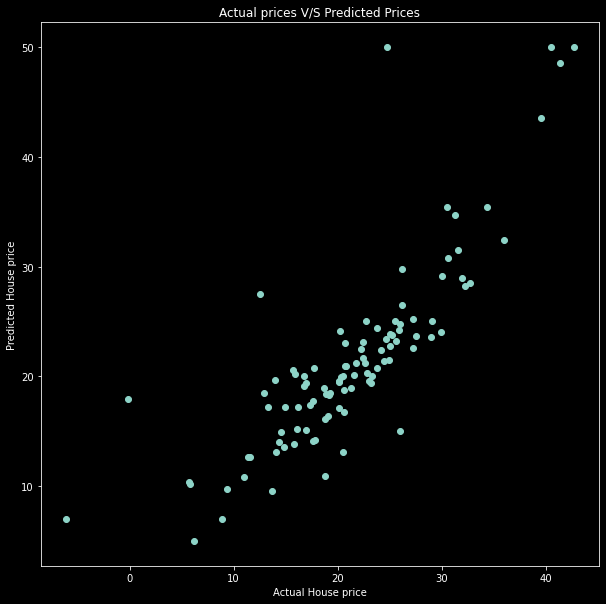

In [21]:
plt.figure(figsize=(10,10))
plt.scatter(y_pred,y_test)
plt.xlabel("Actual House price")
plt.ylabel("Predicted House price")
plt.title("Actual prices V/S Predicted Prices")
plt.show()

In [22]:
lassocv = LassoCV(alphas=None,cv=5,max_iter=200000000,normalize=True)
lassocv.fit(x_train,y_train)

LassoCV(cv=5, max_iter=200000000, normalize=True)

In [23]:
lassocv.alpha_

0.0003414914035828694

In [24]:
lasso = Lasso(alpha=lassocv.alpha_)
lasso.fit(x_train,y_train)

Lasso(alpha=0.0003414914035828694)

In [25]:
ridgecv = RidgeCV(alphas=np.random.uniform(0,10,50),cv = 10,normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([6.13222678, 3.67670492, 7.16308509, 8.14871521, 7.61740271,
       6.04046951, 8.24061336, 1.67193341, 1.47632153, 6.51060257,
       6.47856798, 8.86183506, 7.92239617, 7.87159014, 5.7864377 ,
       7.01055311, 8.1102345 , 1.90034644, 7.03871353, 8.51335676,
       3.48215538, 2.85401268, 9.42038636, 0.06526983, 1.56983684,
       4.46349464, 3.81882843, 1.55533356, 8.95228336, 4.34358092,
       3.37139295, 8.04477579, 4.50542273, 1.53837275, 3.65900964,
       9.91512758, 9.02997355, 9.42400584, 5.10061808, 7.1476783 ,
       0.36179378, 3.72971027, 2.01162234, 2.04451838, 2.58253888,
       9.39521261, 2.50830903, 2.65849917, 1.05770248, 6.3090067 ]),
        cv=10, normalize=True)

In [26]:
ridgecv.alpha_

0.06526983291315958

In [27]:
ridge_lr = Ridge(alpha=ridgecv.alpha_)
ridge_lr.fit(x_train,y_train)

Ridge(alpha=0.06526983291315958)

In [28]:
ele = ElasticNetCV(alphas=None,cv=10)
ele.fit(x_train,y_train)

ElasticNetCV(cv=10)

In [29]:
ele.alpha_

1.422521559160866

In [30]:
ele.l1_ratio_

0.5

In [31]:
elestic_lr = ElasticNet(alpha=ele.alpha_,l1_ratio=ele.l1_ratio_)
elestic_lr.fit(x_train,y_train)
ele_pred = elestic_lr.predict(x_test)
r2_score(ele_pred,y_test)

0.5469038556982473

In [32]:
elestic_lr.score(x_train,y_train)

0.6751044230261126

In [33]:
elestic_lr.score(x_test,y_test)

0.6651210319978073

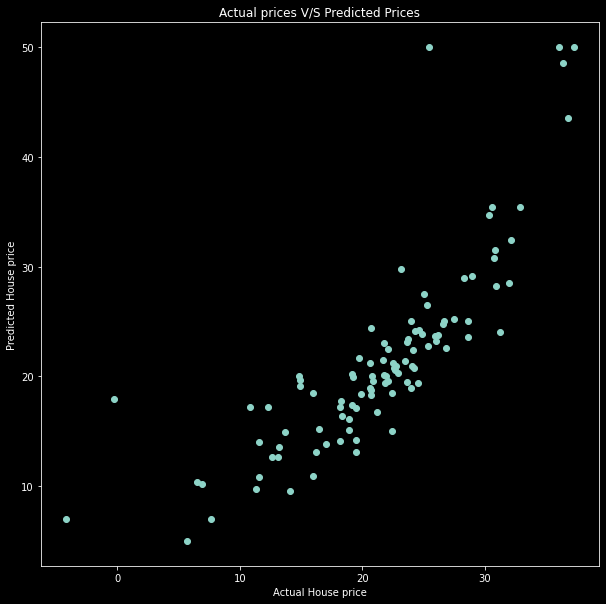

In [51]:
plt.figure(figsize=(10,10))
plt.scatter(ele_pred,y_test)
plt.xlabel("Actual House price")
plt.ylabel("Predicted House price")
plt.title("Actual prices V/S Predicted Prices")
plt.show()